# Logistic Regression



Logistic regression is an importatn model for classification. Consider a dataset with $n$ samples, where $x_i^T = (x_{i1}, \cdots, x_{ip})$ is the features vector, $y_i\in \{ 0, 1\}$ is the class label for $i = 1, 2, \ldots, n$.

| obs |$X_{n\times p}$| $Y_{n\times 1}$ |
|-----|-----------|-----|
| 1   |    $x_1^T$  |$y_1$|
| 2   |    $x_2^T$  |$y_2$|
| ... |           |     |
| n   |    $x_n^T$  |$y_n$|

We assume the label follows a Bernoulli distribution $y_i \sim \textrm{Bernoulli}(p_i)$, $p(y_i=1) = p_i$.
And we assume the logarithm of probability odd-ratio is a linear function
$$\log \dfrac{p_i}{1-p_i} = x_i^T \beta.$$

Let $\eta_i = x_i^T\beta$ be the score, then the probability $p_i$ is simply a mapping from $\mathbb{R}$ to $(0, 1)$
$$p_i = f(\eta_i) = \dfrac{e^{x_i^T\beta}}{1 + e^{x_i^T\beta}} = \dfrac{1}{1 + e^{-x_i^T\beta}},$$
where the function $f(\eta_i) = \dfrac{1}{1 + e^{-\eta_i}}$ is the sigmoid function.

The following code segment plots the curve of sigmoid function.

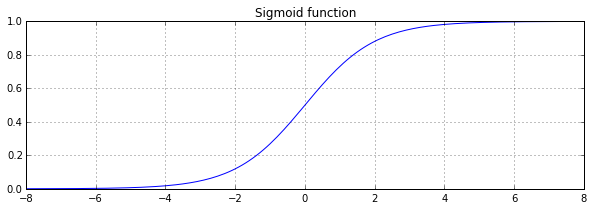

In [24]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

s = np.arange(-8, 8, 0.1)
p = sigmoid(s)

# plot the sigmoid curve.
plt.figure(figsize=(10, 3))
plt.plot(s, p)
plt.grid()
plt.title('Sigmoid function')
plt.show()


## Estimating $\beta$

To estimate $\beta$, we find a maximum likelihood estimator.
Consider the likelihood function 
$$
L(\beta) = \prod_{i=1}^{n}p_i^{y_i} (1-p_i)^{1-y_i} = \prod_{i=1}^{n} \dfrac{e^{y_ix_i^T\beta}}{1+e^{x_i^T\beta}},
$$
we take the logarithm
$$\ell(\beta) = \log L(\beta) = \sum_{i=1}^{n} y_i x_i^T \beta - \log (1 + e^{x_i^T\beta}).$$

### Gradient ascent

There is no close form solution for $\beta$. To find the maximum, let's first take derivative 
$$\ell'(\beta) = \sum_{i=1}^{n} y_i x_i - \dfrac{e^{x_i^T\beta}}{1+e^{x_i^T\beta}}x_i = \sum_{i=1}^{n} (y_i-p_i) x_i.$$

And we use gradient ascent to iteratively update $\beta$ along the gradient direction.
$$
\begin{align*}
\beta_0 &= 0, \\
\beta_{t+1} &= \beta_{t} + \gamma \sum_{i=1}^{n} (y_i-p_i)x_i,
\end{align*}
$$
where $\gamma$ is usually called learning rate.
Intuitively, the idea is to accumulatively memorizes the training examples on which the learner is not doing well, i.e. $y_i \neq p_i$. It is very much like getting your homework graded and learning from the mistakes. 

## Newton-Raphson method

A more efficient ways is to update $\beta$ using Newton-Raphson method.

Take second derivative of the log likelihood function, we have
$$\ell''(\beta) = - \sum_{i=1}^{n} p_i (1-p_i)x_ix_i^T.$$

We then can update $beta$ with a larger learning rate:
$$\beta_{t+1} = \beta_{t} + \ell''(\beta)^{-1} \ell'(\beta).$$

## Relation to Linear Regression

Let $w_i = p_i(1-p_i)$, we can rewrite the update equation as 
$$
\begin{align*}
\beta_{t+1} &= \beta_{t} + \left[ \sum_{i=1}^{n} p_i (1-p_i)x_ix_i^T \right]^{-1} (y_i-p_i)x_i \\
& = \left( \sum_{i=1}^{n} w_i x_ix_i^T \right)^{-1} \left[ \sum_{i=1}^{n} w_i x_ix_i^T \beta_t + (y_i-p_i)x_i\right] \\
& = \left( \sum_{i=1}^{n} w_i x_ix_i^T \right)^{-1} \left[ \sum_{i=1}^{n} w_i x_i \left(x_i^T \beta_t + \dfrac{y_i-p_i}{w_i}\right)\right].
\end{align*}
$$

Let $z_i = x_i^T \beta_t + \dfrac{y_i-p_i}{w_i}, \tilde{x_i} = \dfrac{x_i}{\sqrt{w_i}}, \tilde{z_i} = \dfrac{z_i}{\sqrt{w_i}}$, we can further rewrite the equation above as follows.

$$
\begin{align*}
\beta_{t+1} & = \left( \sum_{i=1}^{n} w_i x_ix_i^T \right)^{-1} \left( \sum_{i=1}^{n} w_i x_i z_i \right) \\
& = \left( \sum_{i=1}^{n} \tilde{x_i} \tilde{x_i}^T \right)^{-1} \left( \sum_{i=1}^{n} \tilde{x_i} \tilde{z_i} \right).
\end{align*}
$$

This means we can actually view $\beta_{t+1}$ as the solution to the linear regression
$$\tilde{z_i} = \tilde{x_i}^T \beta_{t+1}.$$

Using Newton-Raphson method to solve logistic regression can be summarized as follows. This procedure is also referred to as *iterative re-weighted least squares (IRLS)*.

* Start with $\beta_t$,
* $\eta_i = x_i^T\beta_t$.
* $p_i = \textrm{sigmoid}(\eta_i)$,
* $w_i = p_i(1-p_i)$,
* $z_i = \eta_i + \dfrac{y_i-p_i}{w_i}$,
* $\tilde{x_i} = \dfrac{x_i}{\sqrt{w_i}}, \tilde{z_i} = \dfrac{z_i}{\sqrt{w_i}}$,
* $\beta_{t+1} = \texttt{solve}(\tilde{z_i}, \tilde{x_i}).$
